# Data Scientist Professional Practical Exam Submission

**Use this template to write up your summary for submission. Code in Python or R needs to be included.**


## 📝 Task List

Your written report should include both code, output and written text summaries of the following:
- Data Validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Model Development
  - Include your reasons for selecting the models you use as well as a statement of the problem type
  - Code to fit the baseline and comparison models
- Model Evaluation
  - Describe the performance of the two models based on an appropriate metric
- Business Metrics
  - Define a way to compare your model performance to the business
  - Describe how your models perform using this approach
- Final summary including recommendations that the business should undertake

*Start writing report here..*

In [2]:
#Basic imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Reading csv file into dataframe
df = pd.read_csv('recipe_site_traffic_2212.csv')
print(df.head())



   recipe  calories  carbohydrate  ...   category  servings high_traffic
0       1       NaN           NaN  ...       Pork         6         High
1       2     35.48         38.56  ...     Potato         4         High
2       3    914.28         42.68  ...  Breakfast         1          NaN
3       4     97.03         30.56  ...  Beverages         4         High
4       5     27.05          1.85  ...  Beverages         4          NaN

[5 rows x 8 columns]


In [3]:
display(df)

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN
...,...,...,...,...,...,...,...,...
942,943,1161.00,5.31,22.39,44.22,Lunch/Snacks,2,NaN
943,944,NaN,NaN,NaN,NaN,Potato,2,High
944,945,951.74,29.42,3.57,13.87,Pork,2,High
945,946,266.61,35.77,0.97,8.07,Potato,6,High


In [4]:
#Summary of the dataframe, measures of central tendency and null values per feature.
print(df.info(), "\n"*4, df.describe(), "\n"*4, df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB
None 



            recipe     calories  carbohydrate       sugar     protein
count  947.000000   895.000000    895.000000  895.000000  895.000000
mean   474.000000   435.939196     35.069676    9.046547   24.149296
std    273.519652   453.020997     43.949032   14.679176   36.369739
min      1.000000     0.140000      0.030000    0.010000    0.000000
25%    237.500000   110.430000      8.375000    

In [5]:
#Checking Category column. There should be 10 distinct values.
print(df.category.nunique(), df.category.unique())
#It seems that Chicken Breast, and chicken should be together.

11 ['Pork' 'Potato' 'Breakfast' 'Beverages' 'One Dish Meal' 'Chicken Breast'
 'Lunch/Snacks' 'Chicken' 'Vegetable' 'Meat' 'Dessert']


In [6]:
#Checkin Servings . Should be numeric
print(df.servings.unique())
#It seems that we need to remove "as a snack" string and convert it into numeric type.

['6' '4' '1' '2' '4 as a snack' '6 as a snack']


In [7]:
#Checkin high_traffic column
print(df.high_traffic.unique())
#We need to convert this into boolean.

['High' nan]


## DataValidation
This dataset has 947 entries and 8 columns.
| Header | Description |
| --- | ----| 
|Recipe | Numeric, unique identifier of recipe. **Same as description, no cleaning was needed**  |
| Calories | Numeric, range between .14 and 3633.16 calories. **52 missing values** |
| Carbohydrates | Numeric, range between .03 and 530.42. **52 missing values** |
| Sugar | Numeric, range between .01 and 148.75. **52 missing values** |
| Protein | Numeric, range between 0 and 363.36. **52 missing values** |
| Category |  Character, type or recipe. **11 unique values, should be only 10** |
| Servings | Numeric. **Wrong type, there are character type values** |
| High Traffic | Character **High if True, NA if False** |

In the cells below I'll clean each column that needs correction.

In [8]:
#Cleaning Servings column
df.servings = df.servings.str.replace(" as a snack", "")
df.servings = df.servings.astype("int")
df.servings.unique()

array([6, 4, 1, 2])

In [9]:
#Cleaning Category column
df.category = df.category.str.replace("Chicken Breast", "Chicken")
df.category.nunique()

10

In [10]:
#Cleaning high_traffic column
df.high_traffic = np.where(df.high_traffic == "High", True, False)
df.high_traffic.value_counts()

True     574
False    373
Name: high_traffic, dtype: int64

In [11]:
print(df[df.calories.isna()].head(10))
print(round(52/947*100, 2), "% of rows has missing values")

     recipe  calories  carbohydrate  ...       category  servings high_traffic
0         1       NaN           NaN  ...           Pork         6         True
23       24       NaN           NaN  ...           Meat         2        False
48       49       NaN           NaN  ...        Chicken         4        False
82       83       NaN           NaN  ...           Meat         4         True
89       90       NaN           NaN  ...           Pork         6         True
116     117       NaN           NaN  ...        Chicken         6         True
121     122       NaN           NaN  ...        Dessert         2         True
136     137       NaN           NaN  ...  One Dish Meal         2         True
149     150       NaN           NaN  ...         Potato         2         True
187     188       NaN           NaN  ...           Pork         4         True

[10 rows x 8 columns]
5.49 % of rows has missing values


Given that the missing values seems to be missing at random and that they not represent a considerable portion of the df ~5%. I'll be deleting the rows with missing values.

In [12]:
df.dropna(subset=["calories", "carbohydrate", "sugar", "protein"], how="all", inplace=True)
df.describe()

,recipe,calories,carbohydrate,sugar,protein,servings
count,895.000000,895.000000,895.000000,895.000000,895.000000,895.000000
mean,473.652514,435.939196,35.069676,9.046547,24.149296,3.458101
std,272.763283,453.020997,43.949032,14.679176,36.369739,1.735979
min,2.000000,0.140000,0.030000,0.010000,0.000000,1.000000
25%,237.500000,110.430000,8.375000,1.690000,3.195000,2.000000
50%,475.000000,288.550000,21.480000,4.550000,10.800000,4.000000
75%,708.500000,597.650000,44.965000,9.800000,30.200000,4.000000
max,947.000000,3633.160000,530.420000,148.750000,363.360000,6.000000


## Exploratory Data Analysis

Text(0.5, 1.0, 'Calories - Histogram')

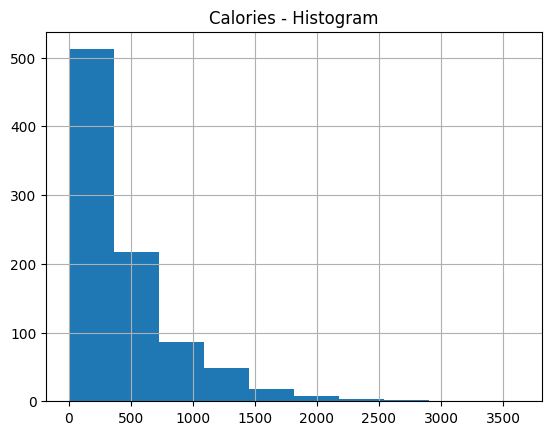

In [13]:
#Plotting histogram of Calories distribution.
df.calories.hist()
plt.title("Calories - Histogram")

According to the histogram we can conclude that most of the recipes are low in calories. Even though this is not reflecting the calories per serving.

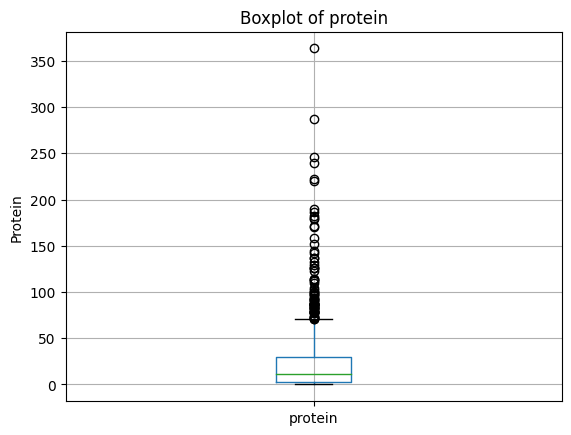

In [14]:
#Plotting boxplot of protein column
df.boxplot(column='protein')
plt.title('Boxplot of protein')
plt.ylabel('Protein')
plt.show()

It seems that there are many outliers in the data, however outliers can contain valuable information about the underlying data distribution. Removing them can lead to a loss of important insights and potentially bias the analysis. So I'll keep them, and apply statistical techniques to mitigate their impact.

<Figure size 800x600 with 0 Axes>

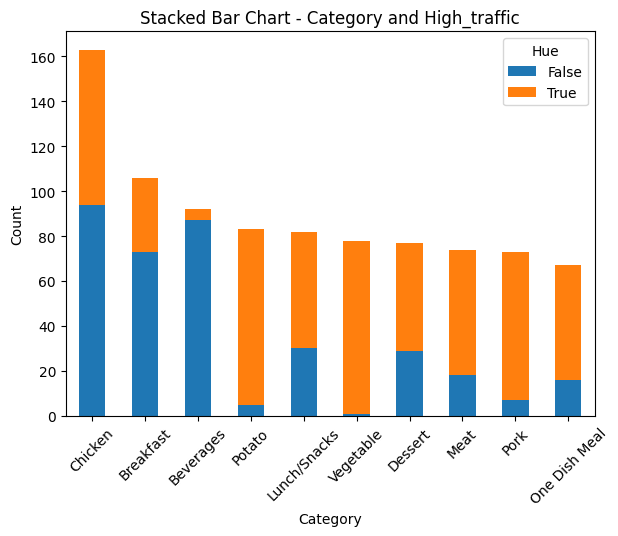

In [15]:
#Creating frequency table
table = pd.crosstab(df['category'], df['high_traffic'])
table = table.reindex(table.sum(axis=1).sort_values(ascending=False).index)

#Plotting stacked bar chart
plt.figure(figsize=(8, 6))
table.plot(kind='bar', stacked=True)

plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Stacked Bar Chart - Category and High_traffic')
plt.legend(title='Hue')

plt.xticks(rotation=0)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

Based on the barplot, we can conclude that Chicken, Breakfast, and Beverages are the top three most common categories.
Meanwhile, Potato, Vegetable, and Pork exhibit a higher proportion of "High Traffic" compared to the rest.
After Model development we should determine if these conclusions align with the insights provided by the Feature Importance analysis.

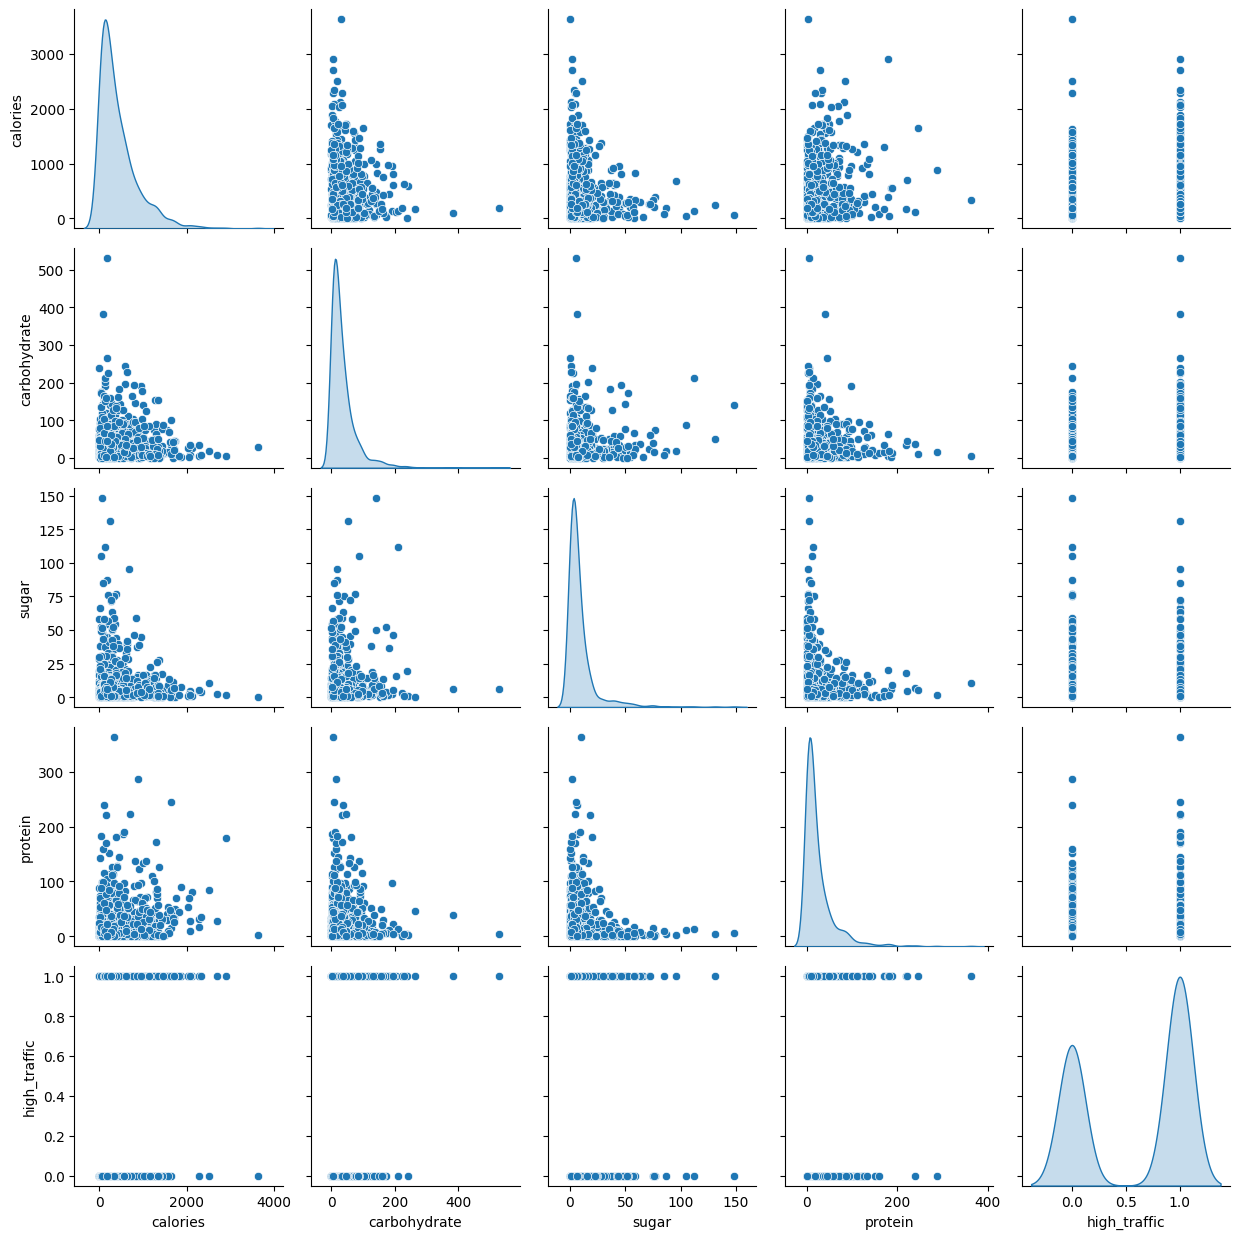

In [16]:
#Plotting pairplot
col_subset = ['calories', 'carbohydrate', 'sugar', 'protein',
       'high_traffic']
sns.pairplot(df[col_subset], kind='scatter', diag_kind='kde')
plt.tight_layout()
plt.show()

From the Pairtplot we can conclude that there are no strong correlations between the variables. Also, they all seem to be left-skewed. We will try to improve that when scaling the data.

## Model Development
Predicting if the site is going to have "High Traffic" or not is a classification problem in machine learning. 
The model I chose was **GradientBoostingClassifier** due to it's capacity to reduce overfitting and improve the accuracy (it reduces prediction variance compared to single decision tree); also it can handle outliers.
For comparative analysis, I've selected **LogisticRegression** as the base model due to its simplicity and ease of interpretation.

For evaluation, I am choosing **recall_score** and **roc_auc_score** (the best value is 1 and the worst value is 0 for both metrics).
Recall Score measures how many of the actual positive cases we were able to predict correctly with our model, the Product Manager is asking for at least 80%.
Meanwhile Roc AUC Score is the measure of the ability of a classifier to distinguish between classes, we were asked to try to minize the FPR (False Positive Rate).

## Prepare Data for Modelling
To enable modelling, we chose 'calories', 'carbohydrate', 'sugar', 'protein', 'servings' and 'category' as features; 'high_traffic' as target variable. 
I've also made the following changes:

- Convert the categorical variables into numeric features
- Split the data into a training set and a test set
- Standarization of the numeric features

In [17]:
#Applying One Hot Encoding to the Category column using Pandas get_dummies.
aux_df = pd.get_dummies(df.category)
df.drop(columns=["category"], inplace=True)
df = pd.concat([df, aux_df], axis=1)
print(df.head(), df.columns)

   recipe  calories  carbohydrate  ...  Pork  Potato  Vegetable
1       2     35.48         38.56  ...     0       1          0
2       3    914.28         42.68  ...     0       0          0
3       4     97.03         30.56  ...     0       0          0
4       5     27.05          1.85  ...     0       0          0
5       6    691.15          3.46  ...     0       0          0

[5 rows x 17 columns] Index(['recipe', 'calories', 'carbohydrate', 'sugar', 'protein', 'servings',
       'high_traffic', 'Beverages', 'Breakfast', 'Chicken', 'Dessert',
       'Lunch/Snacks', 'Meat', 'One Dish Meal', 'Pork', 'Potato', 'Vegetable'],
      dtype='object')


In [18]:
#Code to fit the baseline and comparison models
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score
from sklearn.preprocessing import StandardScaler


#Defining Features and Target variables.
X = df.drop(['recipe', 'high_traffic'], axis=1)
y = df['high_traffic']

#Splitting the data between train and test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#Scaling the data, even though it's not necessary, it can improve the score. 
#We did this after splitting the data to avoid data leakage.
scaler = StandardScaler()
X_train[['calories', 'carbohydrate', 'sugar', 'protein', 'servings']] = scaler.fit_transform(X_train[['calories', 'carbohydrate', 'sugar', 'protein', 'servings']])
X_test[['calories', 'carbohydrate', 'sugar', 'protein', 'servings']] = scaler.transform(X_test[['calories', 'carbohydrate', 'sugar', 'protein', 'servings']])


#Define baseline model to compare. Setting random seed for reproducibility.
base_model = DecisionTreeClassifier(random_state=42)
base_model.fit(X_train, y_train)

#Define comparison model. Setting random seed for reproducibility.
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)

#Make predictions
y_pred_base = base_model.predict(X_test)
y_pred = model.predict(X_test)

print('Accuracy base model', recall_score(y_test, y_pred_base))
print('Accuracy model', recall_score(y_test, y_pred))



Accuracy base model 0.7102803738317757
Accuracy model 0.7476635514018691


## Finding the best parameters for Model

In [19]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, recall_score
from scipy.stats import randint, uniform


custom_recall_scorer = make_scorer(recall_score)

#Finding the best hyperparameters for the model.
param_distributions = {
        "n_estimators": randint(50, 200),
        "learning_rate": uniform(0.01, 0.1),
        "max_depth": [3, 4, 5, 6],
        "min_samples_split": randint(2, 11),
        "min_samples_leaf": randint(1, 11),
        "subsample": uniform(0.6, 0.4)
    }
# Realizar la búsqueda aleatoria
random_search = RandomizedSearchCV(model, param_distributions, n_iter=50, cv=5, scoring=custom_recall_scorer, n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros y el mejor score
best_params = random_search.best_params_
best_score = random_search.best_score_
best_model = random_search.best_estimator_

print("Best Hyperparameters:")
print(best_params)
print("Best Score found:", round(best_score, 2))

Best Hyperparameters:
{'learning_rate': 0.010919705161662964, 'max_depth': 4, 'min_samples_leaf': 9, 'min_samples_split': 4, 'n_estimators': 142, 'subsample': 0.7135683898949863}
Best Score found: 0.85


Next I'll calculate the Recall Score on the test set.

In [20]:
y_pred = best_model.predict(X_test)
round(recall_score(y_pred, y_test), 2)

0.82

Index(['Meat', 'One Dish Meal', 'servings', 'Dessert', 'Lunch/Snacks', 'Pork',
       'carbohydrate', 'Potato', 'sugar', 'calories', 'Vegetable', 'protein',
       'Chicken', 'Breakfast', 'Beverages'],
      dtype='object')


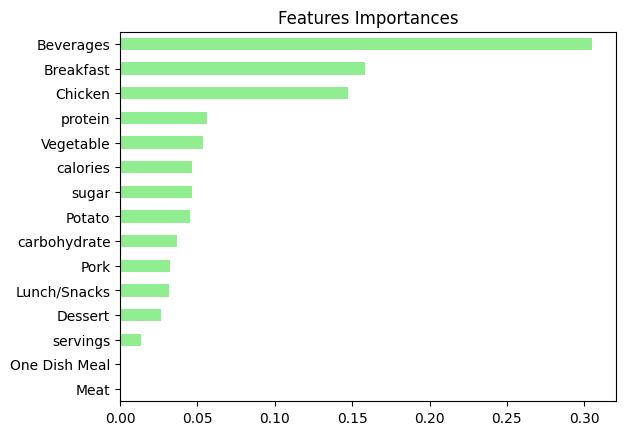

In [21]:
# Create a pandas Series of features importances
importances = pd.Series(data=best_model.feature_importances_,
                        index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()
print(importances_sorted.index)

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', x='data',color="lightgreen")
plt.title('Features Importances')
plt.show()

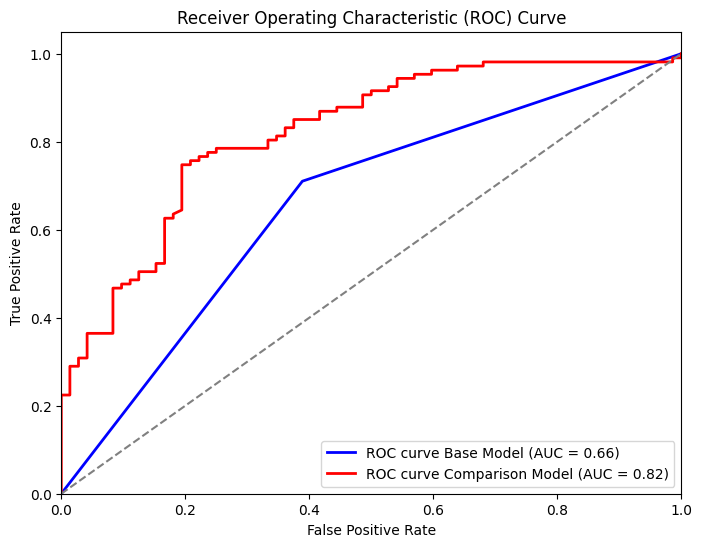

AUC Base Model: 0.66
AUC Comparison Model: 0.82


In [22]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

#Calculating Class Probabilities
y_pred_proba_base = base_model.predict_proba(X_test)[:, 1]
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

#Calculating False Positive Rate and True Positive Rate
fpr_base, tpr_base, thresholds_base  = roc_curve(y_test, y_pred_proba_base)
fpr, tpr, thresholds  = roc_curve(y_test, y_pred_proba)

#Calculating Area Under the Curve 
auc_base = roc_auc_score(y_test, y_pred_proba_base)
auc = roc_auc_score(y_test, y_pred_proba)

# Ploting ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_base, tpr_base, color='blue', lw=2, label='ROC curve Base Model (AUC = %0.2f)' % auc_base)
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve Comparison Model (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print('AUC Base Model:', round(auc_base, 2))
print('AUC Comparison Model:', round(auc, 2))


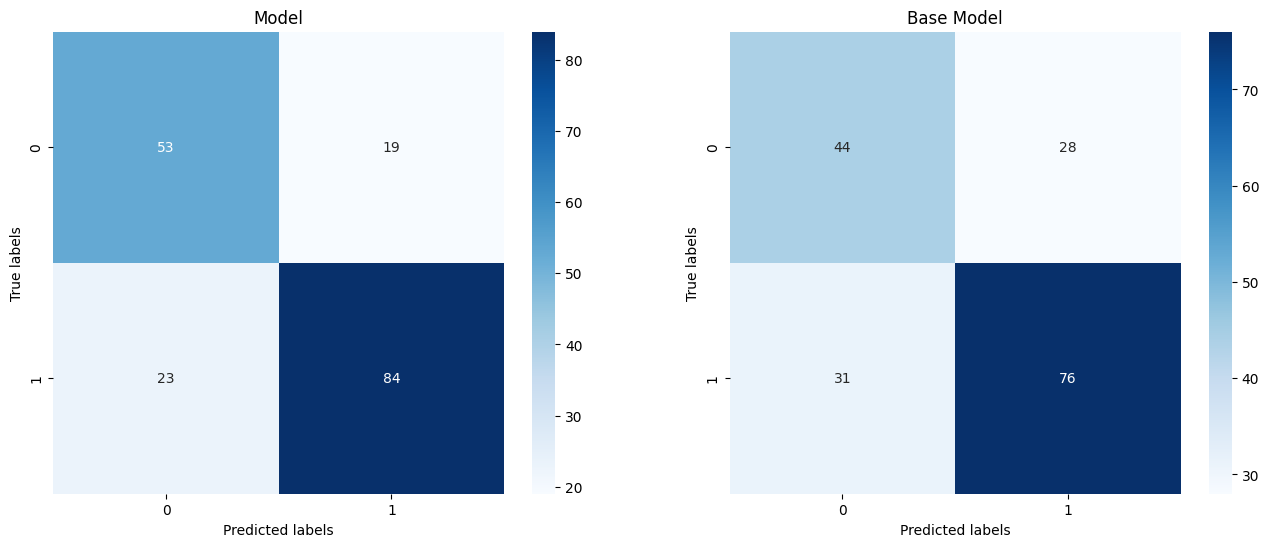

In [23]:
from sklearn.metrics import confusion_matrix

conf_matrix_base = confusion_matrix(y_test, y_pred_base)
conf_matrix = confusion_matrix(y_test, y_pred)

# Create figure
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plotting MODEL Corr Matrix
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', ax=axes[0])
axes[0].set_xlabel('Predicted labels')
axes[0].set_ylabel('True labels')
axes[0].set_title('Model')

# Plotting BASE_MODEL Corr Matrix
sns.heatmap(conf_matrix_base, annot=True, cmap='Blues', fmt='g', ax=axes[1])
axes[1].set_xlabel('Predicted labels')
axes[1].set_ylabel('True labels')
axes[1].set_title('Base Model')

# Show the graphs
plt.show()

# Results
## Recall Score
- **Decision Tree Clasiffier (base_recall)** : 0.71
- **Gradient Boosting Clasifffier (model_recall)** : 0.82

*Given that model_recall > base_recall*, this means that the Gradient Boosting Clasifffier is better at avoiding missing positive instances.

## ROC AUC Score
- **Decision Tree Clasiffier (base_roc)** : 0.66
- **Gradient Boosting Clasifffier (model_roc)** : 0.82
 
*Given that model_roc > base_roc*, this indicates that the Gradient Boosting Clasifffier has better discrimination ability between positive and false instances.

# Evaluate by business criteria
The company wants to us to predict which recipes will be popular 80% of the time and minimize the
chance of showing unpopular recipes. Given that the emphasis is on minimizing false positives we can use precision as our KPI.
Precision measures the proportion of instances identified as positive by the model that are truly positive.
Using the correlation matrix above, we can calculate the Precision of the two models.

**Decision Tree Classifier** --> 76 / (76 + 28) = 0.74

**Gradient Boosting Classifier** --> 84 / (84 + 19) = 0.82

For this KPI, the Gradient Boosting Classifier also performs better.


# Recommendations
Considering that the Head of Data Science will be on vacation for the following weeks and has delegated decision-making to me, I'll recommend:
1. Test the model how the model performs in the most recent data, and compare its prediction to selection of the Product Manager. A/B Testing would be useful in this instance.
2. Identify, fix errors and collect more data. This will, most likely, improve the predictive capacity of the model. (quantity of ingredients, for example)
3. Feature Engineering, e.g reduce the categories in model, create more meaningful features from the variables.
4. Deploy the model.
5. Collaborate with stakeholders to implement and monitor the recommendations given by the model.


## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation